In [1]:
import pandas as pd

In [77]:
# Načtení CSV souboru
data = pd.read_csv("data/ockovani.csv")

In [78]:
# Vypsání přehledu tabulky
data.head()

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek
0,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,18-24,48,0
1,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,25-29,108,0
2,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,30-34,102,0
3,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,35-39,112,0
4,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,40-44,170,0


In [62]:
# Přehled číselných sloupců
data.describe()

,prvnich_davek,druhych_davek
count,27066.000000,27066.000000
mean,45.003732,20.096653
std,109.735324,76.545544
min,0.000000,0.000000
25%,4.000000,0.000000
50%,13.000000,0.000000
75%,39.000000,12.000000
max,2600.000000,2507.000000


In [64]:
# Přehled unikátních hodnot
data["vakcina"].value_counts()

Comirnaty                   15050
COVID-19 Vaccine Moderna     6124
VAXZEVRIA                    5892
Name: vakcina, dtype: int64

In [ ]:
# Seznam sloupců
data.columns

In [31]:
# Vyčištění dat
data = data.drop(columns=["kraj_nuts_kod"])

In [11]:
# Vytažení konkrétního sloupce
druhe_davky = data["druhych_davek"]
druhe_davky # numpy-like pole

0        0
1        0
2        0
3        0
4        0
        ..
27061    0
27062    1
27063    4
27064    1
27065    0
Name: druhych_davek, Length: 27066, dtype: int64

In [12]:
# Vytažení více sloupců
data[["prvnich_davek", "druhych_davek"]]

,prvnich_davek,druhych_davek
0,48,0
1,108,0
2,102,0
3,112,0
4,170,0
...,...,...
27061,40,0
27062,60,1
27063,104,4
27064,63,1


In [13]:
# Přístup k řádkům

# První řádek, druhý sloupec
data.iloc[0, 1]

'Comirnaty'

In [15]:
# Řádek s hodnotou indexu 0 a sloupcem "vakcina"
data.loc[0, "vakcina"]

'Comirnaty'

In [19]:
# Čtyři řádky, tři sloupce
data.iloc[1:5, 0:3]

,datum,vakcina,kraj_nuts_kod
1,2020-12-27,Comirnaty,CZ010
2,2020-12-27,Comirnaty,CZ010
3,2020-12-27,Comirnaty,CZ010
4,2020-12-27,Comirnaty,CZ010


In [ ]:
# Vytvoření nového sloupce
data["celkem_davek"] = data["prvnich_davek"] + data["druhych_davek"]

In [38]:
# Práce se sloupci
data["prvnich_davek"].max()

2600

In [39]:
data["prvnich_davek"].sum()

1218071

In [23]:
# Filtrování
# Záznamy, kde bylo alespoň 100 prvních dávek
data[data["prvnich_davek"] >= 100]

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek
1,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,25-29,108,0
2,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,30-34,102,0
3,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,35-39,112,0
4,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,40-44,170,0
5,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,45-49,156,0
...,...,...,...,...,...,...,...
27011,2021-04-01,VAXZEVRIA,CZ053,Pardubický kraj,70-74,131,0
27012,2021-04-01,VAXZEVRIA,CZ053,Pardubický kraj,75-79,105,0
27035,2021-04-01,VAXZEVRIA,CZ064,Jihomoravský kraj,70-74,168,2
27036,2021-04-01,VAXZEVRIA,CZ064,Jihomoravský kraj,75-79,148,1


In [25]:
# Záznamy, kde bylo alespoň 100 prvních dávek a žádné druhé dávky
data[(data["prvnich_davek"] >= 100) & (data["druhych_davek"] == 0)]

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek
1,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,25-29,108,0
2,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,30-34,102,0
3,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,35-39,112,0
4,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,40-44,170,0
5,2020-12-27,Comirnaty,CZ010,Hlavní město Praha,45-49,156,0
...,...,...,...,...,...,...,...
26922,2021-04-01,VAXZEVRIA,CZ010,Hlavní město Praha,65-69,105,0
26923,2021-04-01,VAXZEVRIA,CZ010,Hlavní město Praha,70-74,133,0
26936,2021-04-01,VAXZEVRIA,CZ020,Středočeský kraj,70-74,113,0
27011,2021-04-01,VAXZEVRIA,CZ053,Pardubický kraj,70-74,131,0


In [32]:
# Třízení
top5 = data.sort_values(by="prvnich_davek", ascending=False)[:5]
top5

,datum,vakcina,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek
3341,2021-01-21,Comirnaty,Hlavní město Praha,80+,2600,15
3151,2021-01-20,Comirnaty,Hlavní město Praha,80+,2334,35
3540,2021-01-22,Comirnaty,Hlavní město Praha,80+,2274,6
14071,2021-03-04,Comirnaty,Jihočeský kraj,75-79,2120,16
11555,2021-02-25,Comirnaty,Jihočeský kraj,80+,2092,30


In [15]:
# Seskupování
data.groupby("datum").sum()

,prvnich_davek,druhych_davek
datum,,
2020-12-27,1249,0
2020-12-28,2292,0
2020-12-29,3441,0
2020-12-30,3465,0
2020-12-31,1306,0
...,...,...
2021-03-28,5430,4069
2021-03-29,18341,20358
2021-03-30,23600,21818


In [81]:
a = data.groupby(["datum", "kraj_nazev", "vakcina", "vekova_skupina"]).sum()
a

prvnich_davek  \
datum      kraj_nazev         vakcina   vekova_skupina                  
2020-12-27 Hlavní město Praha Comirnaty 18-24                      48   
                                        25-29                     108   
                                        30-34                     102   
                                        35-39                     112   
                                        40-44                     170   
...                                                               ...   
2021-04-01 Ústecký kraj       VAXZEVRIA 60-64                      16   
                                        65-69                      42   
                                        70-74                      59   
                                        75-79                      30   
                                        80+                        12   

                                                        druhych_davek  
datum      kraj_nazev         vakcina   vekova_skupina                 
2020-12-27 Hlavní město Praha Comirnaty 18-24                       0  
                                        25-29                       0  
                                        30-34                       0  
                                        35-39                       0  
                                        40-44                       0  
...                                                               ...  
2021-04-01 Ústecký kraj       VAXZEVRIA 60-64                       0  
                                        65-69                       0  
                                        70-74                       0  
                                        75-79                       0  
                                        80+                         0  

[27066 rows x 2 columns]

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# import knihoven na kreslení grafů

In [83]:
counts = a.reset_index()
counts["datum"] = pd.to_datetime(counts["datum"])

<AxesSubplot:xlabel='datum', ylabel='prvnich_davek'>

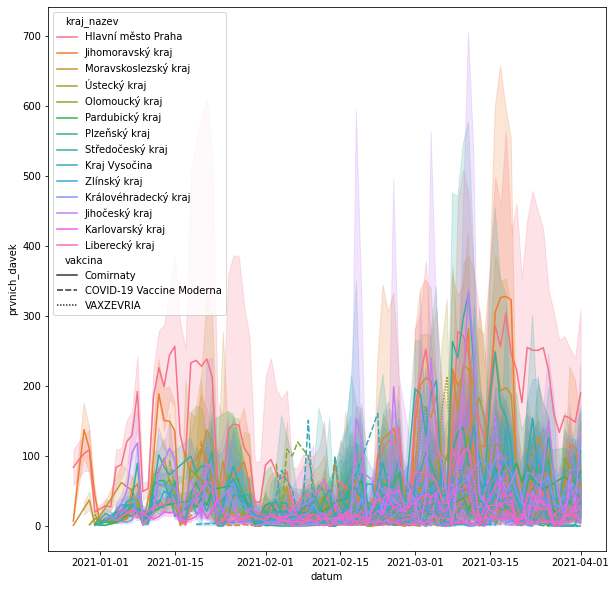

In [84]:
# Kompletní graf očkování
fig = plt.figure(figsize=(10, 10))
g = sns.lineplot(
    data=counts,
    x="datum",
    y="prvnich_davek",
    hue="kraj_nazev",
    style="vakcina"
)
g

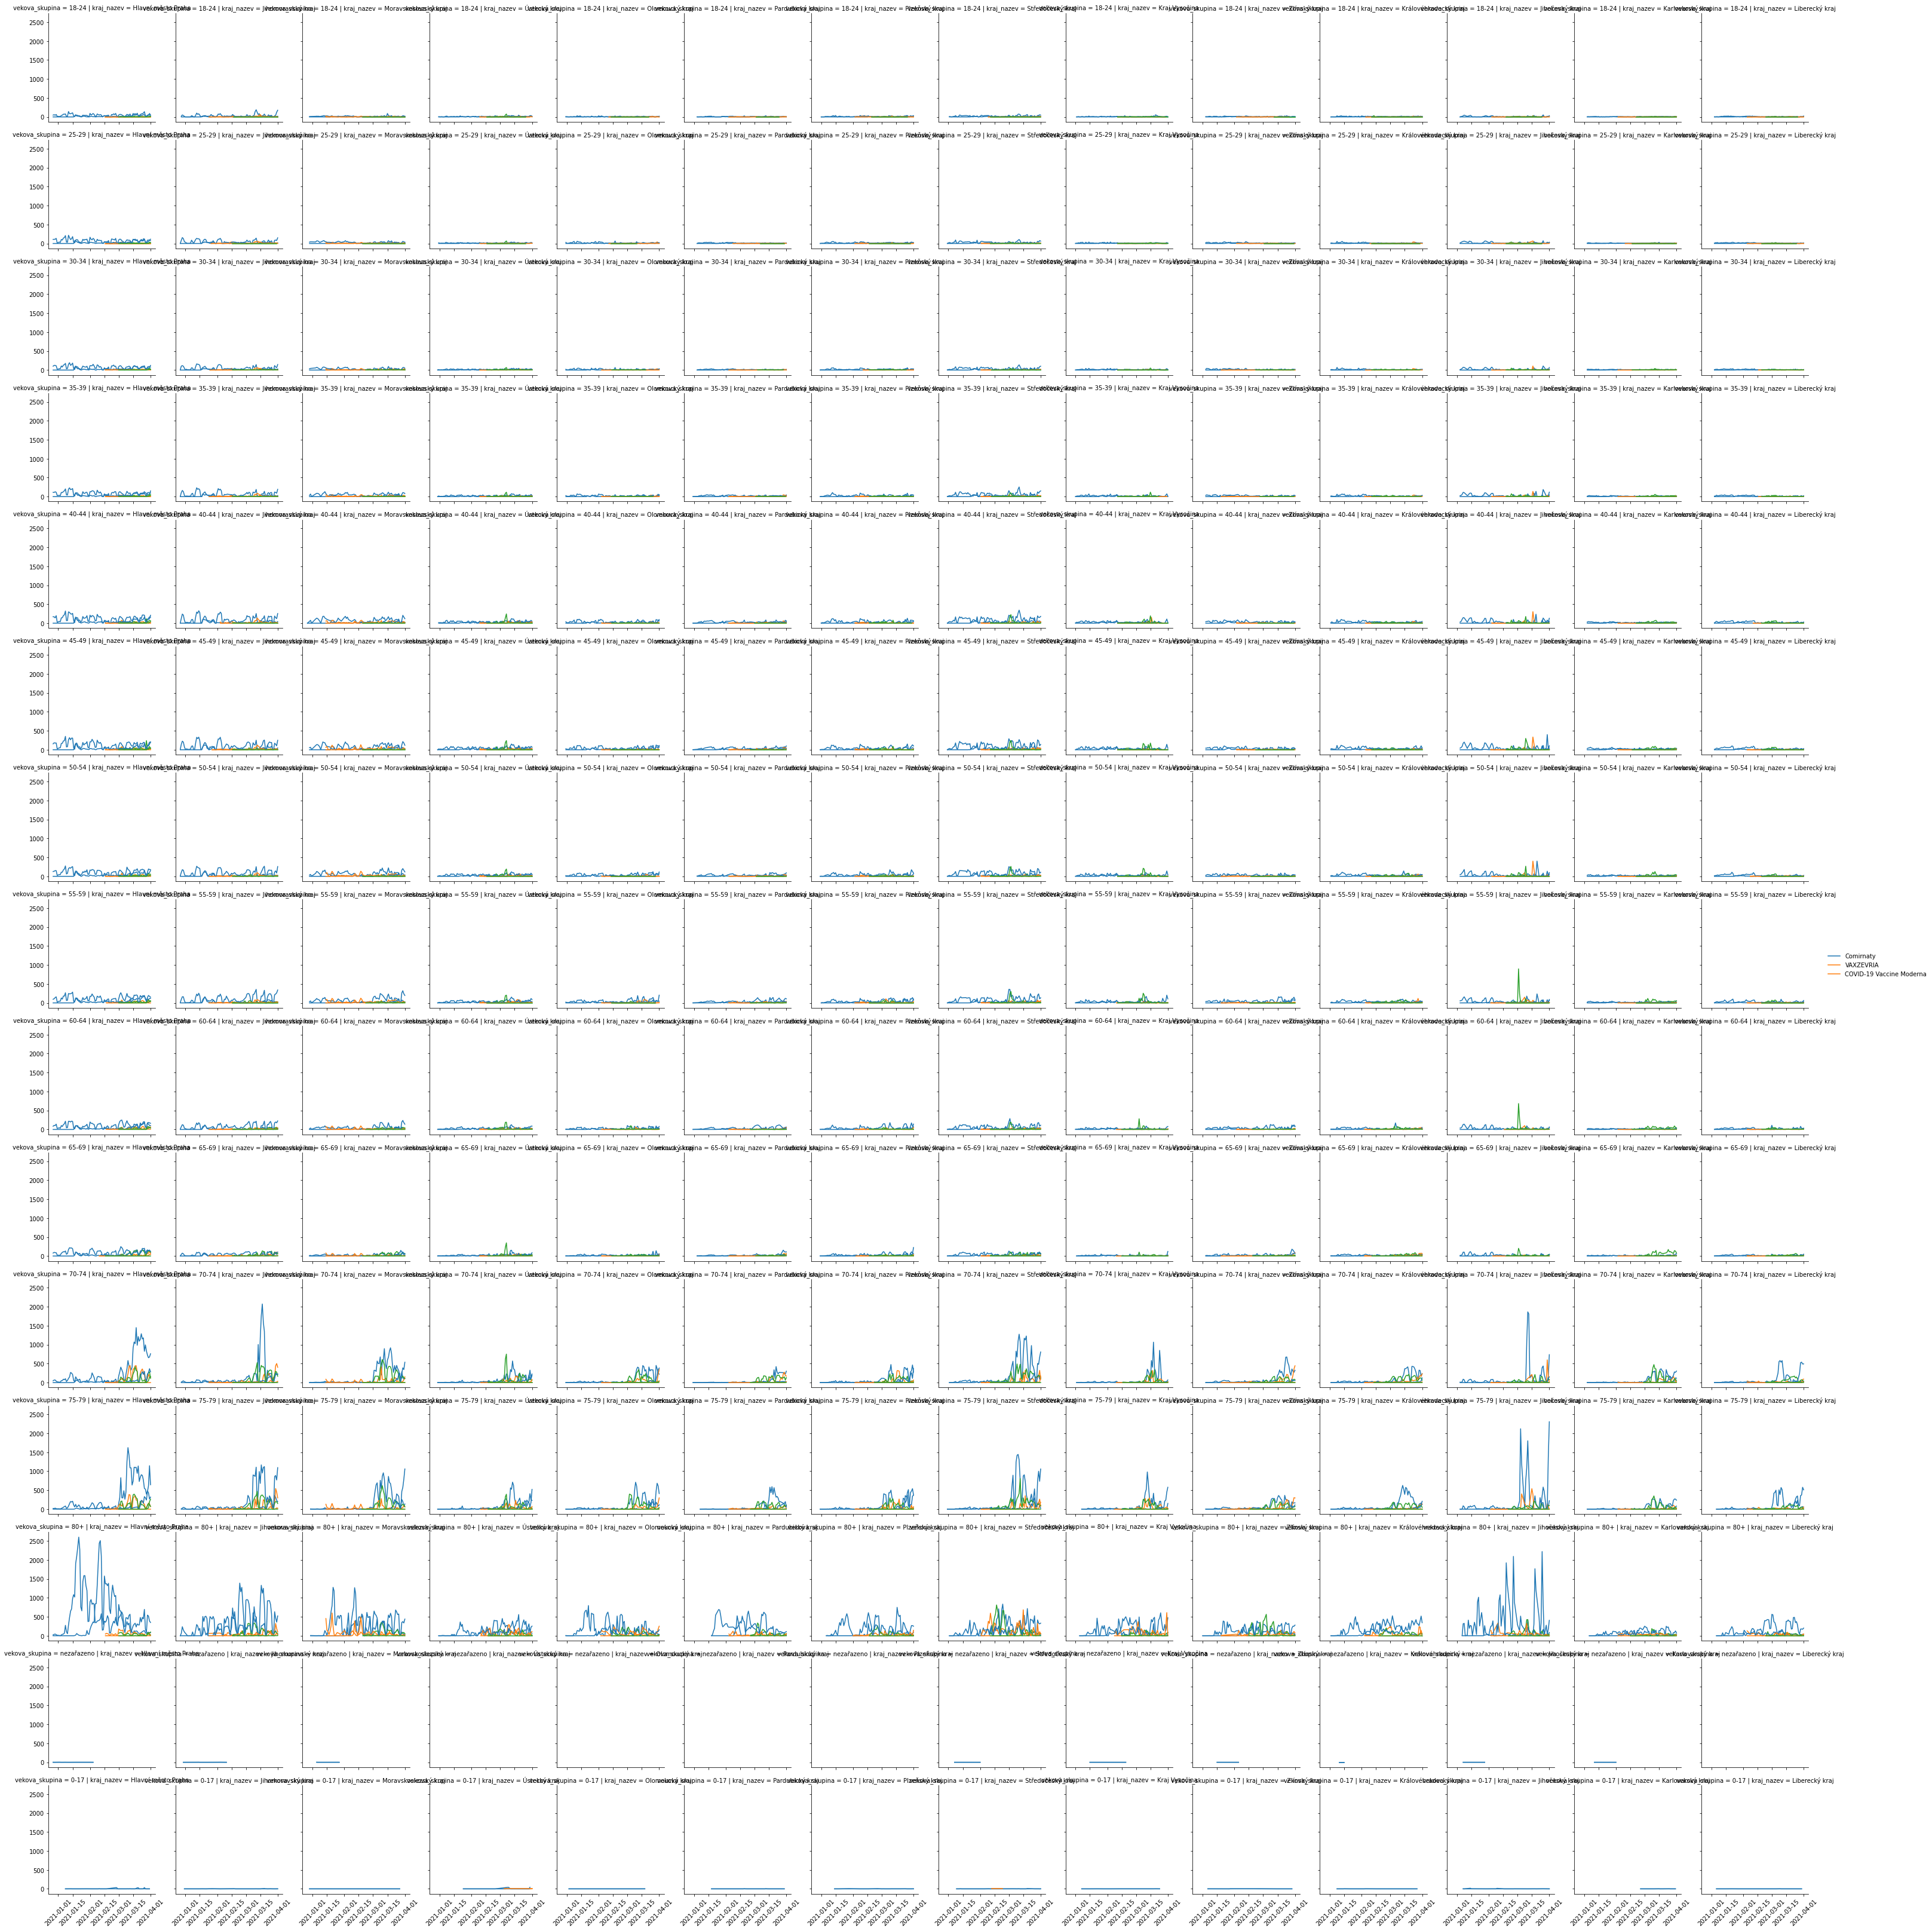

In [85]:
# Mřížka grafů po krajích
def plot_fn(data, **kwargs):
    sns.lineplot(
        data=data,
        x="datum",
        y="prvnich_davek",
        hue="vakcina"
    )
    sns.lineplot(
        data=data,
        x="datum",
        y="druhych_davek",
        hue="vakcina"
    )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)

grid = sns.FacetGrid(counts, col="kraj_nazev", row="vekova_skupina", sharey=True)
grid.map_dataframe(plot_fn)
grid.add_legend()

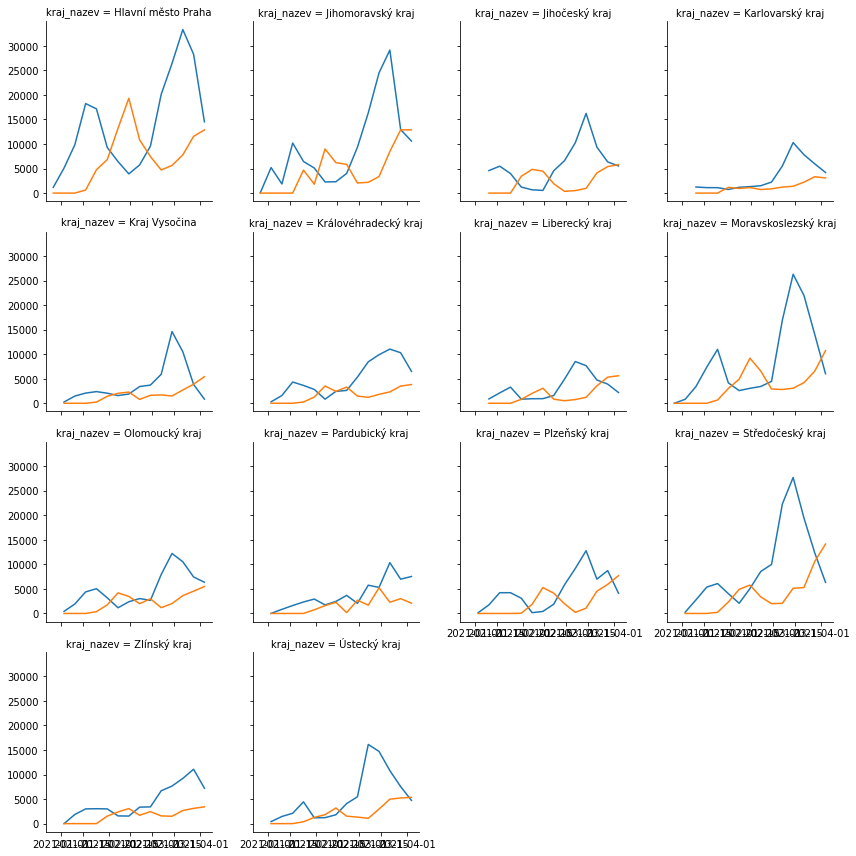

In [60]:
# Přesamplování po týdnech

def plot_fn(data, **kwargs):
    sns.lineplot(
        data=data,
        x="datum",
        y="prvnich_davek"
    )
    sns.lineplot(
        data=data,
        x="datum",
        y="druhych_davek"
    )

counts_week = counts.copy()
counts_week = counts_week.set_index("datum")
counts_week = counts_week.groupby("kraj_nazev").resample("1W").sum()
counts_week = counts_week.reset_index()
grid = sns.FacetGrid(counts_week, col="kraj_nazev", col_wrap=4, sharey=True)
grid.map_dataframe(plot_fn)

In [30]:
# Prázdné hodnoty
data.isnull()

,datum,vakcina,kraj_nuts_kod,kraj_nazev,vekova_skupina,prvnich_davek,druhych_davek
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
27061,False,False,False,False,False,False,False
27062,False,False,False,False,False,False,False
27063,False,False,False,False,False,False,False
27064,False,False,False,False,False,False,False
